In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("data/charging_sessions.csv")

In [36]:
df['connectionTime'] = pd.to_datetime(df['connectionTime'], errors='coerce')
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], errors='coerce')
df['chargingDuration'] = (df['disconnectTime'] - df['connectionTime']).dt.total_seconds() / 3600


### Compare Charging durations

In [37]:
# Compare average charging duration and kWh delivered for each site
site_stats = df.groupby('siteID')[['chargingDuration', 'kWhDelivered']].mean()
print(site_stats)


        chargingDuration  kWhDelivered
siteID                                
1               6.866313     14.063156
2               5.653222      9.249425


### Compare missing user IDs

In [38]:
# Create a column indicating if the userID is missing (i.e., unregistered)
df['userID_missing'] = df['userID'].isnull()

# Count the number of unregistered users (missing userID) for each site
unregistered_users_per_site = df.groupby('siteID')['userID_missing'].sum()
print(unregistered_users_per_site)


siteID
1     2227
2    15036
Name: userID_missing, dtype: int64


### Site 1:
#### has a lower number of unregistered users. At a private hub, users are likely required to register or gain authorization for access.
### Site 2:
#### The high number of sessions with missing user information at Site 2 suggests that the site serves many unregistered or occasional users.

### Compare charging times

Unique siteID values: [1 2]


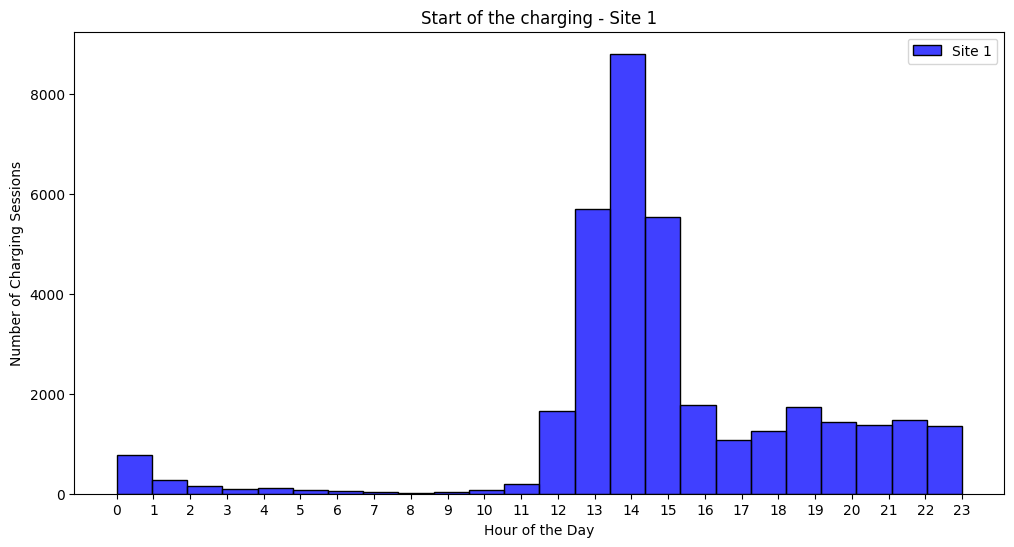

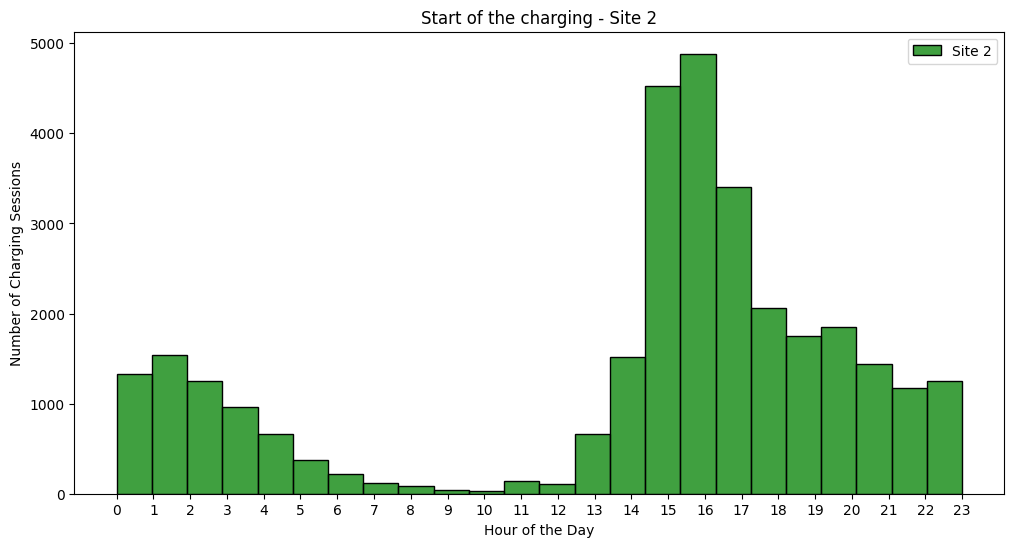

In [39]:

# Debugging: Check unique values in siteID
print("Unique siteID values:", df['siteID'].unique())

# Extract hour of the day from connectionTime
df['chargingHour'] = df['connectionTime'].dt.hour

# Separate the data for each site
site1_data = df[df['siteID'] == 1]  # Adjust the value if needed
site2_data = df[df['siteID'] == 2]  # Adjust the value if needed

# Plot charging hours for Site 1
plt.figure(figsize=(12, 6))
sns.histplot(site1_data['chargingHour'].dropna(), bins=24, kde=False, color='blue', label='Site 1')
plt.title('Start of the charging - Site 1')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Charging Sessions')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

# Plot charging hours for Site 2
plt.figure(figsize=(12, 6))
sns.histplot(site2_data['chargingHour'].dropna(), bins=24, kde=False, color='green', label='Site 2')
plt.title('Start of the charging - Site 2')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Charging Sessions')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

### Site 1: 
#### Charging times are more concentrated, with clear peaks during specific hours. This pattern reflects a predictable usage schedule typical of private hubs, such as employees charging their vehicles during working hours or residents charging overnight. This regularity is indicative of a site primarily used by a consistent and routine-oriented group of users.

### Site 2: 
#### In contrast, the charging times at Site 2 vary more significantly, suggesting a public charging hub where usage is driven by more sporadic and diverse demand. Customers at public hubs tend to charge their vehicles as needed, leading to less predictable and more spread-out patterns.

### Compare charging durations

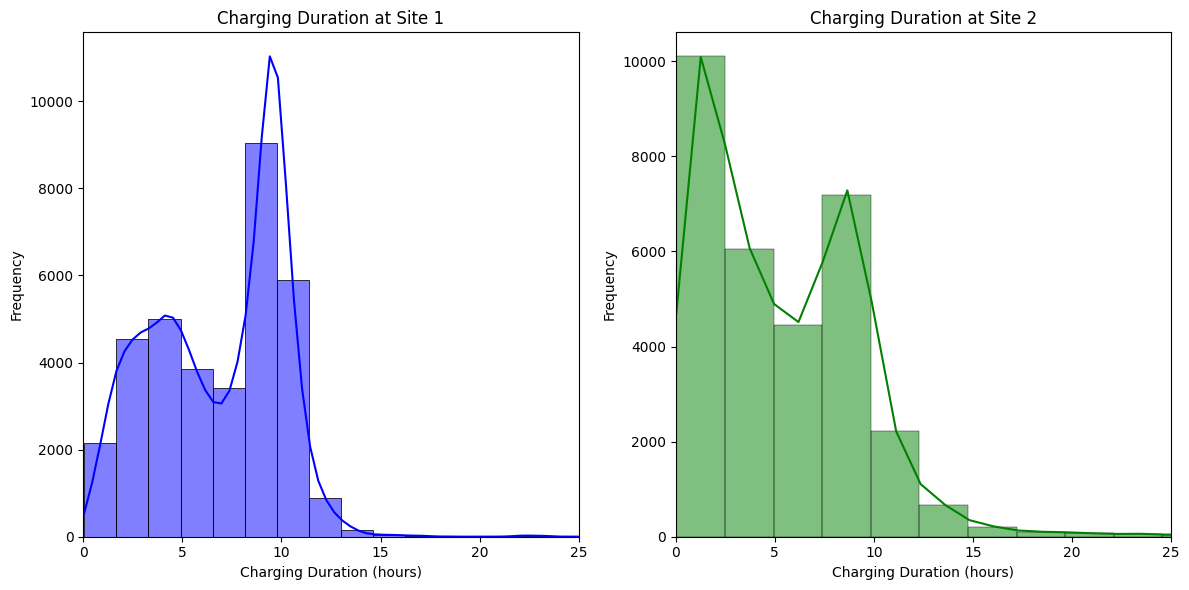

In [40]:

# Filter data for each site
site1_data = df[df['siteID'] == 1]
site2_data = df[df['siteID'] == 2]

# Plot histograms or density plots
plt.figure(figsize=(12, 6))

# Site 1
plt.subplot(1, 2, 1)
sns.histplot(site1_data['chargingDuration'], bins=50, kde=True, color='blue')
plt.title("Charging Duration at Site 1")
plt.xlabel("Charging Duration (hours)")
plt.ylabel("Frequency")
plt.xlim(0, 25) 

# Site 2
plt.subplot(1, 2, 2)
sns.histplot(site2_data['chargingDuration'], bins=100, kde=True, color='green')
plt.title("Charging Duration at Site 2")
plt.xlabel("Charging Duration (hours)")
plt.ylabel("Frequency")
plt.xlim(0, 25) 

plt.tight_layout()
plt.show()


### Site 1: 
#### Longer charging durations are characteristic of private hubs where users, such as employees or residents, leave their vehicles plugged in for extended periods, often during work hours or overnight. This behavior reflects a setting where users have predictable access and do not face external pressures to vacate the charging station quickly.
### Site 2: 
#### Shorter charging durations at Site 2 are indicative of a public hub, where users often charge their vehicles just enough to continue their journey. These hubs typically experience higher turnover and prioritize quick access for multiple users, aligning with the needs of transient or occasional customers.

### Compare number of visits per customer

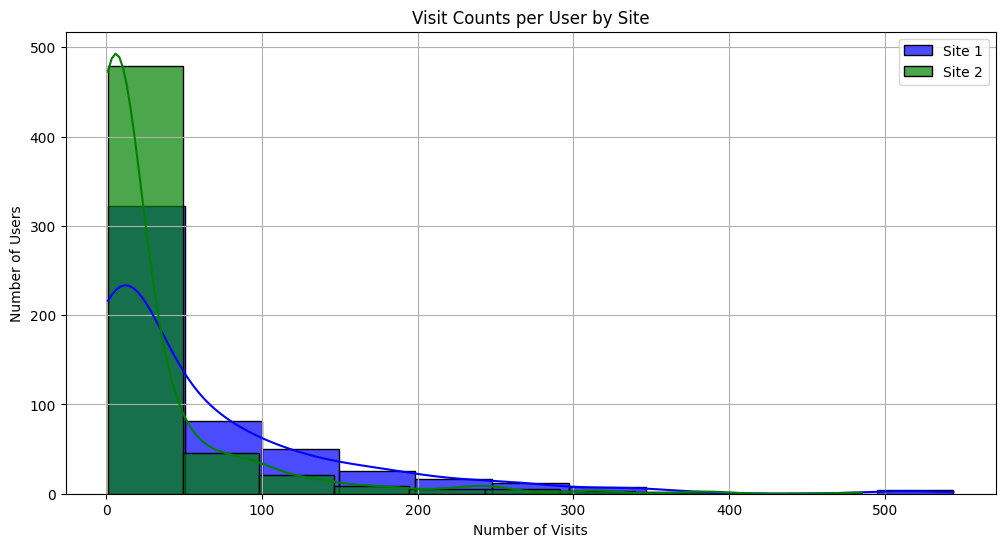

In [41]:
plt.figure(figsize=(12, 6))

# Histogram with KDE for Site 1
sns.histplot(data=site1_visits, x='visit_count', kde=True, color='blue', label='Site 1', binwidth=50, alpha=0.7)

# Histogram with KDE for Site 2
sns.histplot(data=site2_visits, x='visit_count', kde=True, color='green', label='Site 2', binwidth=50, alpha=0.7)

plt.title("Visit Counts per User by Site")
plt.xlabel("Number of Visits")
plt.ylabel("Number of Users")
plt.legend()
plt.grid(True)
plt.show()


### Site 1:
#### has a higher proportion of frequent users compared to Site 2. This pattern indicates that Site 1 likely caters to a consistent user base, such as employees or residents, who rely on this charging hub regularly.
### Site 2:
#### has fewer frequent users, indicating that the site serves a more diverse and transient customer base.

### Compare charging sessions across the seasons

/var/folders/61/k09lw4nn2894_p4hfq0wlkcc0000gq/T/ipykernel_70963/3907703552.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


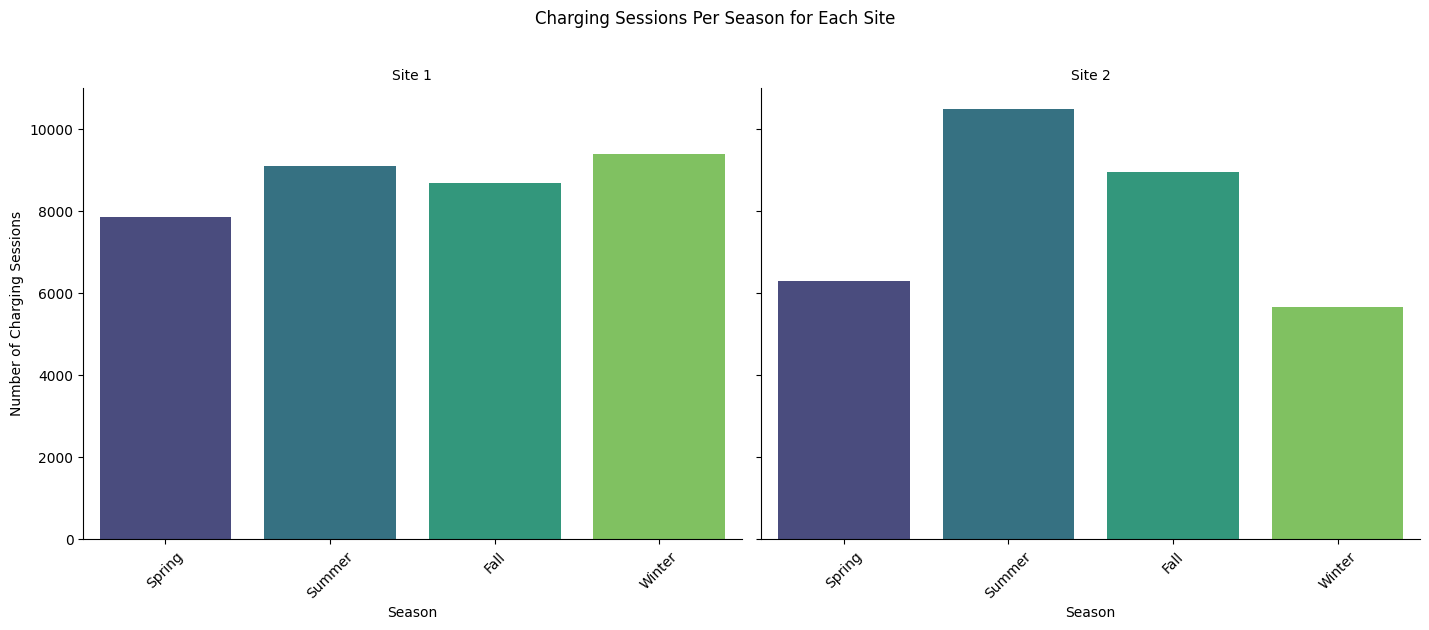

In [42]:

# extract the month
df['month'] = df['connectionTime'].dt.month

# Define the seasons based on months
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['season'] = df['month'].apply(get_season)

# Define the custom order for seasons
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Group the data by season and site
season_data = df.groupby(['season', 'siteID']).size().reset_index(name='session_count')

# Create a FacetGrid to plot the two sites side by side
g = sns.catplot(
    data=season_data,
    x='season',
    y='session_count',
    col='siteID',
    kind='bar',
    order=season_order,
    height=6,
    aspect=1.2,
    palette='viridis',
    sharey=True  # Ensures both plots have the same y-axis scale
)

# Customize the plot
g.set_titles("Site {col_name}")
g.set_axis_labels("Season", "Number of Charging Sessions")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Charging Sessions Per Season for Each Site")

plt.show()


### Site 1:
#### shows a relatively even distribution of usage across the seasons, suggesting that the charging patterns are not strongly influenced by external seasonal factors. This consistency is typical for private hubs, where users rely on charging as part of their routine, regardless of the time of year.
### Site 2:
#### experiences greater seasonal variations in usage, with peaks in summer and fall. These variations suggest that the site might be influenced by seasonal travel patterns, leisure activities, or tourist traffic, all of which are typical for public hubs.

## Conclusion:

### Site 1: 
#### The concentrated charging times, combined with longer charging durations, more frequent and registered users, and a consistent seasonal distribution, support the conclusion that Site 1 operates as a private charging hub, serving a stable and routine-oriented user base.
### Site 2: 
#### The higher variability in charging times, shorter charging durations, and a greater proportion of unregistered users with seasonal usage peaks align with the characteristics of a public charging hub, serving occasional users.